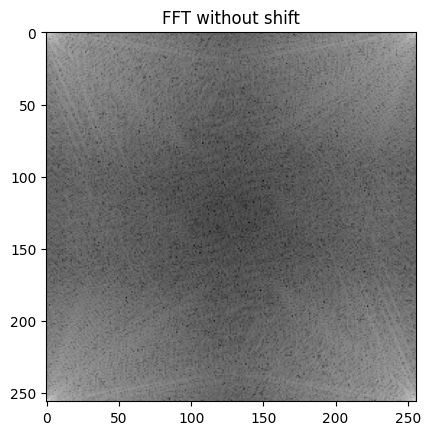

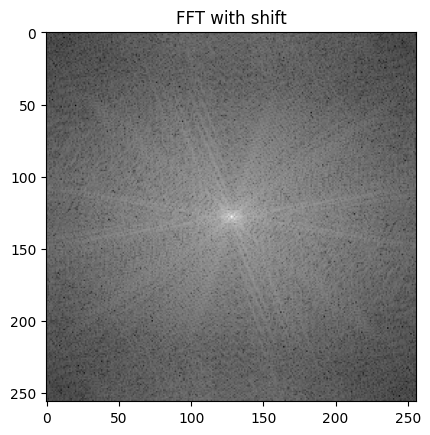

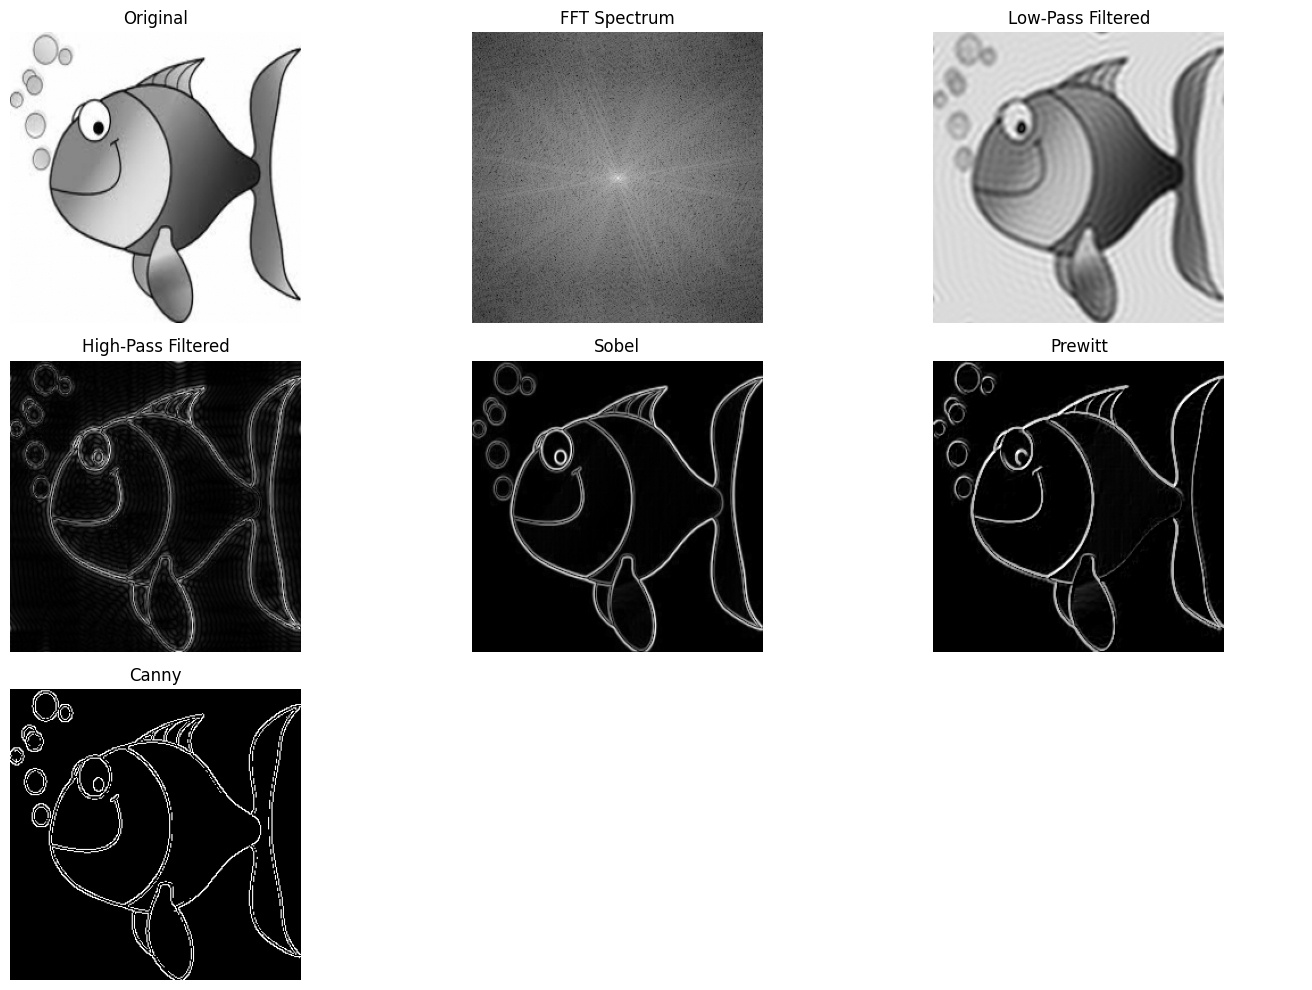

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Load and resize grayscale image ===
img = cv2.imread("stdimgs/HappyFish.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

# === FFT and Frequency Filtering ===
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
plt.imshow(np.log(np.abs(f)), cmap="gray"), plt.title("FFT without shift")
plt.show()
plt.imshow(np.log(np.abs(fshift)), cmap="gray"), plt.title("FFT with shift")
plt.show()

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Low-pass filter mask
lpf_mask = np.zeros((rows, cols), np.uint8)
lpf_mask[crow - 30 : crow + 30, ccol - 30 : ccol + 30] = 1
lpf = fshift * lpf_mask
lpf_img = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf)))

# High-pass filter mask
hpf_mask = 1 - lpf_mask
hpf = fshift * hpf_mask
hpf_img = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf)))

# === Edge Detection ===

# Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Prewitt (manual)
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)
prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

# Canny
canny = cv2.Canny(img, 100, 200)

# === Visualization ===
plt.figure(figsize=(14, 10))

# Frequency Domain Results
plt.subplot(3, 3, 1), plt.imshow(img, cmap="gray"), plt.title("Original"), plt.axis(
    "off"
)
plt.subplot(3, 3, 2), plt.imshow(magnitude_spectrum, cmap="gray"), plt.title(
    "FFT Spectrum"
), plt.axis("off")
plt.subplot(3, 3, 3), plt.imshow(lpf_img, cmap="gray"), plt.title(
    "Low-Pass Filtered"
), plt.axis("off")
plt.subplot(3, 3, 4), plt.imshow(hpf_img, cmap="gray"), plt.title(
    "High-Pass Filtered"
), plt.axis("off")

# Edge Detection
plt.subplot(3, 3, 5), plt.imshow(sobel, cmap="gray"), plt.title("Sobel"), plt.axis(
    "off"
)
plt.subplot(3, 3, 6), plt.imshow(prewitt, cmap="gray"), plt.title("Prewitt"), plt.axis(
    "off"
)
plt.subplot(3, 3, 7), plt.imshow(canny, cmap="gray"), plt.title("Canny"), plt.axis(
    "off"
)

# Empty subplots for alignment
plt.subplot(3, 3, 8).axis("off")
plt.subplot(3, 3, 9).axis("off")

plt.tight_layout()
plt.show()